In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes # for type hinting purposes

prefix = os.path.join('..', 'DATASETS')

datasets = {
    'pima_indians': os.path.join(prefix, 'pima-indians-diabetes.data'), 
    'iris_plant': os.path.join(prefix, 'iris_proc.data'),
    'churn_modelling': os.path.join(prefix, 'Churn_Modelling.csv'),
    'social_network': os.path.join(prefix, 'Social_Network_Ads.csv'),
}

for name, file in datasets.items():
    if not os.path.exists(file):
        raise FileNotFoundError(f'Could not find following dataset : [{name}] in {file}')

pima_indians_df = pd.read_csv(
    datasets['pima_indians'],
    # names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'outcome'],
    names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPF', 'Age', 'Outcome'],
)
iris_plant_df = pd.read_csv(datasets['iris_plant'])
churn_modelling_df = pd.read_csv(datasets['churn_modelling'])
social_network_df = pd.read_csv(datasets['social_network'])

print('OK : Datasets loaded')

# print(pima_indians_data, pima_indians_data.shape)
# print(iris_plant_data, iris_plant_data.shape)
# print(churn_modelling_data, churn_modelling_data.shape)
# print(social_network_data, social_network_data.shape)

OK : Datasets loaded


%%html
<style>
td, th {border: 2px solid white}
table {border-collapse: collapse}
</style>

## Pima Indians dataset visualization

668 observations of medical detials.
Age, number of times pregnant, blood workup.
Class value that indicates whether the patient suffered an onset of diabetes within 5 years of when the measurements were taken (1) or not (0).

|original indexes | Pregnancies | Glucose | BloodPressure | SkinThickness | 
|:--|:-|:-|:-|:-|
| new indexes |preg|plas|pres|skin|

|Insulin | BMI | DiabetesPedigreeFunction | Age | Outcome |
|:-|:-|:-|:-|:-|
|test|mass|pedi|age|class|

### Pregnancies
Number of times pregnant


In [3]:
pima_indians_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPF         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

Text(0.5, 0, 'Age')

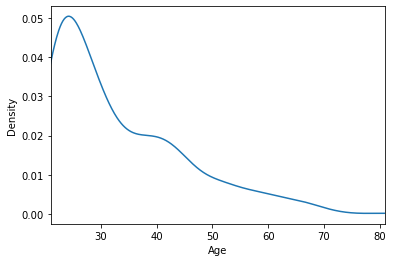

In [4]:
ax = pima_indians_df.Age.plot(kind='kde')
ax.set_xlim((pima_indians_df.Age.min(), pima_indians_df.Age.max()))
ax.set_xlabel('Age')
# pima_indians_data.age.hist()

Text(0.5, 0, 'age')

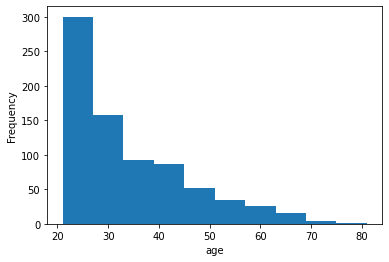

In [5]:
ax: Axes = pima_indians_df.Age.plot.hist()
ax.set_xlabel('age')

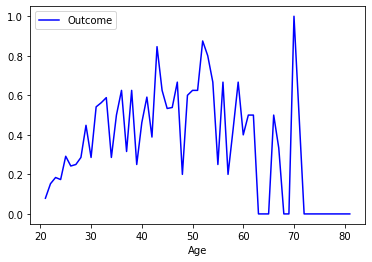

In [6]:
# test_sum = pd.DataFrame(pima_indians_df.groupby('age').outcome.count())
# test_sum.reset_index(level=0, inplace=True)
# test_sum.plot.scatter(
#     x='age',
#     y='outcome',
#     color='blue'
# )

test_sum = pd.DataFrame(pima_indians_df.groupby('Age').Outcome.mean())
test_sum.reset_index(level=0, inplace=True)
test_sum.plot(
    x='Age',
    y='Outcome',
    color='blue'
)

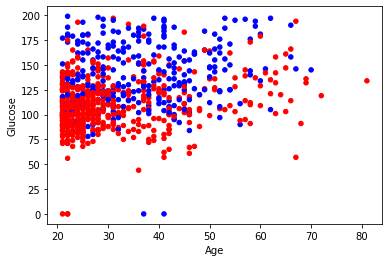

In [7]:
def outcome_to_color(outcome):
    return 'blue' if outcome else 'red'

pima_indians_df.plot.scatter(
    x='Age',
    y='Glucose',
    color=pima_indians_df.Outcome.map(outcome_to_color)
)

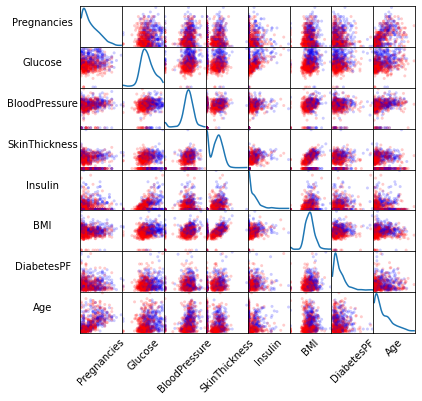

In [8]:
## test scatter matrix
colors = pd.Series(pima_indians_df.Outcome.map({0: 'red', 1: 'blue'}))
sm = pd.plotting.scatter_matrix(
    pima_indians_df.loc[:, pima_indians_df.columns != 'Outcome'],
    alpha=0.2,
    figsize=(6, 6),
    diagonal='kde',
    color=colors,
)

# better scatter_matrix display from https://stackoverflow.com/a/32568134/12182226

# #Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# #May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.9,0.5) for s in sm.reshape(-1)]

# #Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

# Social Network Ads dataset

In [9]:
social_network_df.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

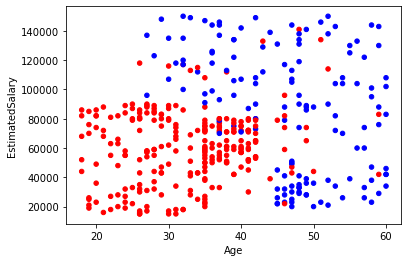

In [10]:
def purchased_to_color(purchased):
    return 'blue' if purchased else 'red'

social_network_df.plot.scatter(
    x='Age',
    y='EstimatedSalary',
    color=social_network_df.Purchased.map(purchased_to_color)
)